# Model Selection process

## Method: Split data to 70% training, 10% validation, 20% test data
### select model parameters for 1-Regression, 2-Lasso Regression, 3-Ridge Regression, 4-Random Forest



In [1]:
#load in bachelor dataset, do one-hot encoding for hometown, and standardize Age, NumRoses3, FirstDate
import pandas as pd
import numpy as np
from utils import *
import matplotlib.pyplot as plt

df_bachelor = pd.read_csv("data_processed/bachelor_preprocessed.csv")
X,y = encode_data(df_bachelor)
X

,Age,FIR,NumRoses3,FirstDate,Region_M,Region_N,Region_O,Region_Other,Region_S,Region_W
0,23.0,0.0,0.0,3.0,1,0,0,0,0,0
1,29.0,0.0,0.0,3.0,0,0,0,0,1,0
2,24.0,0.0,0.0,3.0,0,0,0,0,1,0
3,24.0,0.0,0.0,4.0,0,0,0,0,0,1
4,22.0,0.0,0.0,0.0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
415,26.0,0.0,0.0,0.0,0,0,0,0,0,1
416,26.0,0.0,0.0,0.0,0,0,0,0,0,1
417,23.0,0.0,0.0,0.0,0,0,0,0,0,1
418,29.0,1.0,2.0,3.0,0,0,0,1,0,0


294 294
42 42
84 84
Winners in training:  9
Winners in validation:  2
Winners in test:  4


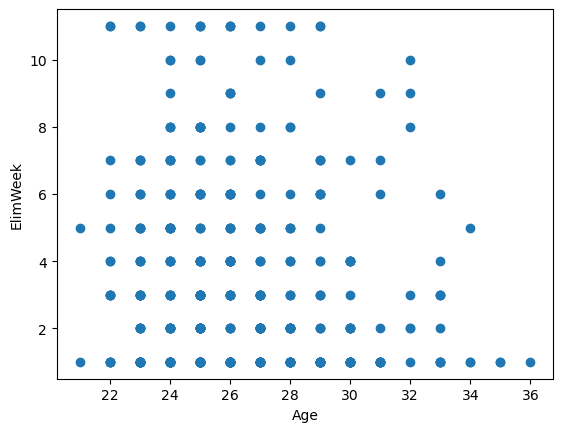

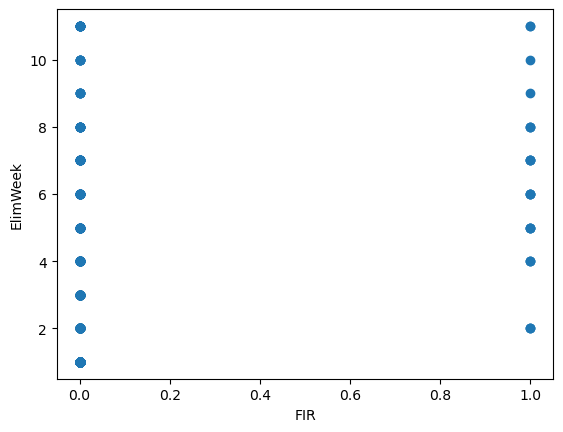

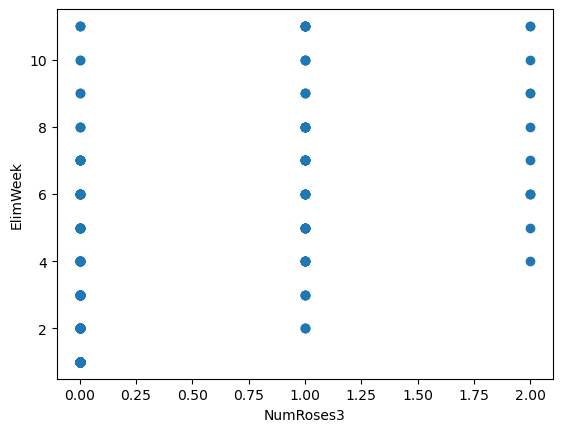

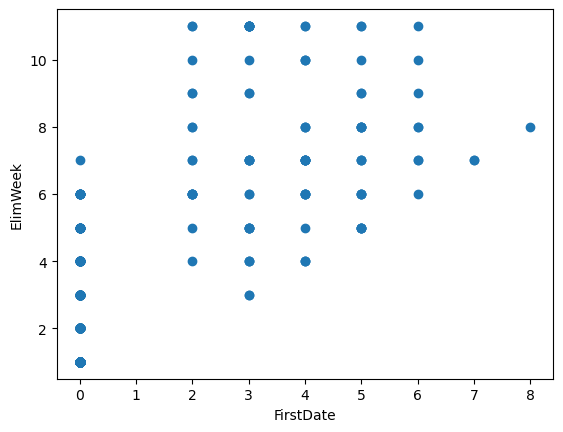

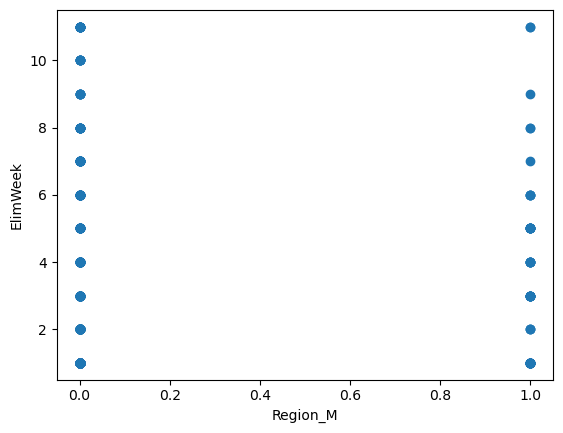

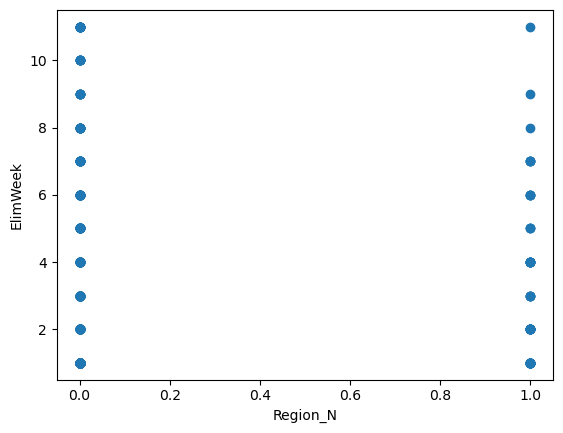

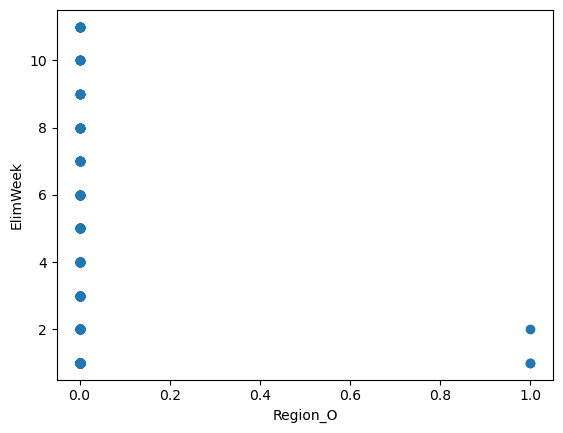

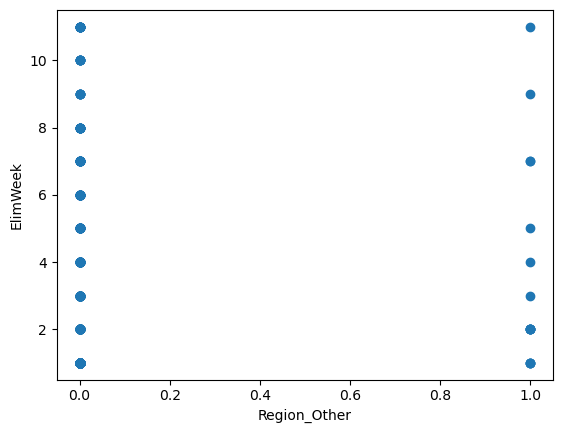

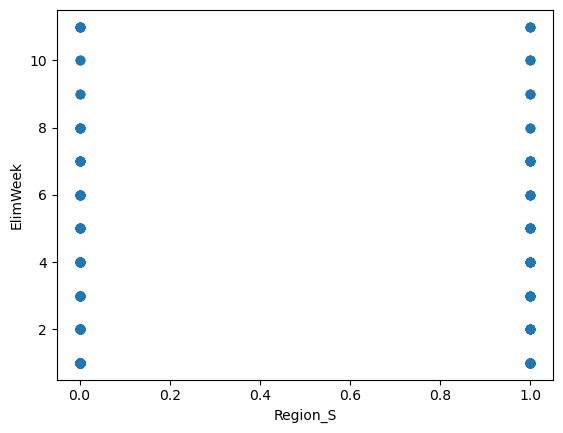

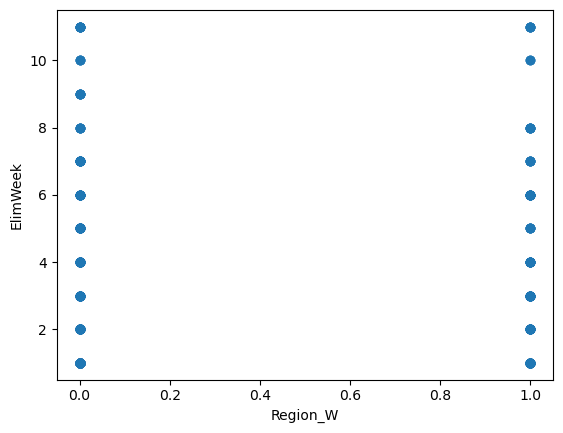

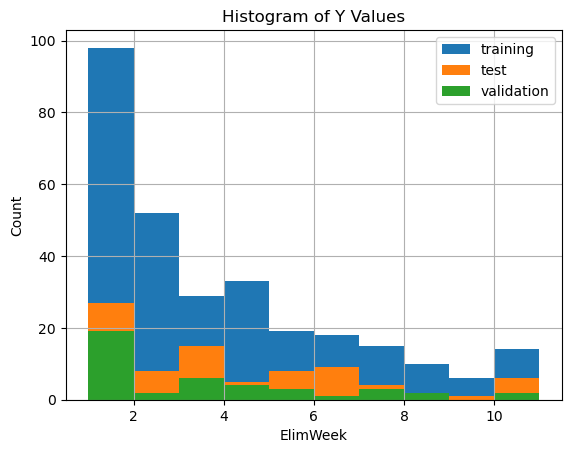

In [2]:
# Split the training, validation, test data
np.random.seed(100)

#default is trainsize=0.7, valsize=0.1, testsize=0.2
X_train, y_train, X_val, y_val, X_test, y_test = split_data(X,y)

#standardize values based on training statistics
X_val = standardize_data(X_train, X_val)
X_test = standardize_data(X_train, X_test)
X_train = standardize_data(X_train, X_train)
print(len(X_train), len(y_train))
print(len(X_val), len(y_val))
print(len(X_test), len(y_test))

print("Winners in training: ", sum(y_train == 11))
print("Winners in validation: ", sum(y_val == 11))
print("Winners in test: ", sum(y_test == 11))

# plot the features - without normalization
for i in range(X.shape[1]):
    plt.clf()
    plt.scatter(X.iloc[:,i], y)
    plt.xlabel(X.columns[i])
    plt.ylabel("ElimWeek")
    plt.show()
    
#histograms
y_train.hist()
y_test.hist()
y_val.hist()
plt.xlabel("ElimWeek")
plt.ylabel("Count")
plt.title("Histogram of Y Values")
plt.legend(["training", "test", "validation"])

## Linear Regression

In [3]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error

fit_intercept=False

reg_linear = model_selection(X_train, y_train, X_val, y_val,'no',fit_intercept)

Linear Regression
Validation MSE: 2.917


## Lasso (L1)

In [4]:
reg_L1 = model_selection(X_train, y_train, X_val, y_val,"L1",fit_intercept)

L1 Best log2 lambda: -4.5
Validation MSE: 2.850291001906426


## Ridge (L2)

In [5]:
reg_L2 = model_selection(X_train, y_train, X_val, y_val, "L2",fit_intercept)

L2 Best log2 lambda: 1.5
Validation MSE: 2.8774546226602773


## Random Forest

In [6]:
from sklearn.ensemble import RandomForestRegressor

reg_RF = model_sel_RF(X_train, y_train, X_val, y_val)

Random Forest
num trees =  50
max depth =  2
Validation MSE:  2.703 


## Now try different variations of features:
#1. Bio data: Age, Hometown Region

#2. PCA with top 3 components

In [7]:
# Bio Data
X_bio = X.iloc[:, [0,4,5,6,7,8,9]]

# Split the training, validation, test data
np.random.seed(100)
X_train, y_train, X_val, y_val, X_test, y_test = split_data(X_bio,y)

reg_linear_bio = model_selection(X_train, y_train, X_val, y_val,"no",fit_intercept)
reg_L1_bio = model_selection(X_train, y_train, X_val, y_val,"L1",fit_intercept)
reg_L2_bio = model_selection(X_train, y_train, X_val, y_val,"L2",fit_intercept)
reg_RF_bio = model_sel_RF(X_train, y_train, X_val, y_val)

Linear Regression
Validation MSE: 7.938
L1 Best log2 lambda: -7.0
Validation MSE: 7.743305885628623
L2 Best log2 lambda: 0.0
Validation MSE: 7.74459932930649
Random Forest
num trees =  10
max depth =  1
Validation MSE:  7.705 


In [8]:
# PCA
from sklearn.decomposition import PCA

# Split the training, validation, test data
np.random.seed(100)

#default is trainsize=0.7, valsize=0.1, testsize=0.2
X_train, y_train, X_val, y_val, X_test, y_test = split_data(X,y)

#standardize values based on training statistics
X_val = standardize_data(X_train, X_val)
X_test = standardize_data(X_train, X_test)
X_train = standardize_data(X_train, X_train)
print(len(X_train), len(y_train))
print(len(X_val), len(y_val))
print(len(X_test), len(y_test))

pca = PCA(n_components=3)
pca.fit(X_train)
print("explained_variance",pca.explained_variance_ratio_)
print("sum of explained_variance",sum(pca.explained_variance_ratio_))

X_val = pca.transform(X_val)
X_test = pca.transform(X_test)
X_train = pca.transform(X_train)


reg_linear_pca = model_selection(X_train, y_train, X_val, y_val,"no",fit_intercept)
reg_L1_pca = model_selection(X_train, y_train, X_val, y_val,"L1",fit_intercept)
reg_L2_pca = model_selection(X_train, y_train, X_val, y_val,"L2",fit_intercept)
reg_RF_pca= model_sel_RF(X_train, y_train, X_val, y_val)

294 294
42 42
84 84
explained_variance [0.38189644 0.26751789 0.14906135]
sum of explained_variance 0.7984756833502278
Linear Regression
Validation MSE: 14.856
L1 Best log2 lambda: -2.5
Validation MSE: 14.667171712725613
L2 Best log2 lambda: 6.5
Validation MSE: 14.725806723536756
Random Forest
num trees =  10
max depth =  2
Validation MSE:  2.520 
